(0.0, 6.0)

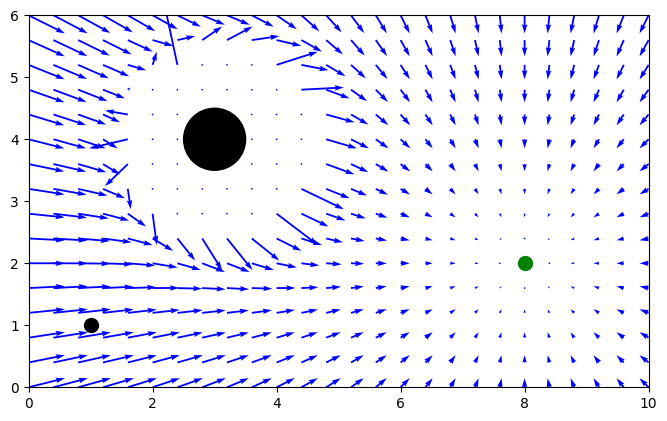

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import ipywidgets

WORLDX, WORLDY = 10, 6 


def att_force(q, goal, katt=.01):
    return katt*(goal - q)

def rep_force(q, obs, R=3, krep=.1):
    
    # Obstáculo: (x, y, r)
    v = q - obs[0:2]
    d = np.linalg.norm(v, axis=1) - obs[2]
    d = d.reshape((len(v) ,1))
    
    rep = (1/d**2)*((1/d)-(1/R))*(v/d)    
    
    invalid = np.squeeze(d > R)
    rep[invalid, :] = 0
    
    return krep*rep

 

# Robot
robot = np.array([1, 1])
# Goal
goal = np.array([8, 2])
# Obstáculo: (x, y, r)
obs = np.array([3, 4, .5])

fig = plt.figure(figsize=(8,5), dpi=100)
ax = fig.add_subplot(111, aspect='equal')

XX, YY = np.meshgrid(np.arange(0, WORLDX+.4, .4), np.arange(0, WORLDY+.4, .4))
XY = np.dstack([XX, YY]).reshape(-1, 2)

Fatt = att_force(XY, goal)
Fatt_x = Fatt[:,0]
Fatt_y = Fatt[:,1]

Frep = rep_force(XY, obs)
Frep_x = np.copy(Frep[:,0])  # Cuidado com as referências
Frep_y = np.copy(Frep[:,1])  # Cuidado com as referências


# Definindo a força total e normalizando
Ft = Fatt + Frep
Ft_x = Ft[:,0]
Ft_y = Ft[:,1]

fmax = .15
Fm = np.linalg.norm(Ft, axis=1)
Ft_x[Fm > fmax], Ft_y[Fm > fmax] = 0, 0

#Threshold Força de Repulsão
# fmax = .15
# Fm = np.linalg.norm(Frep, axis=1)
# Frep_x[Fm > fmax], Frep_y[Fm > fmax] = 0, 0


# Adicionar as setas dos vetores no quiver (Repulsão e atração)
# ax.quiver(XX, YY, Fatt_x, Fatt_y, color='g')
# ax.quiver(XX, YY, Frep_x, Frep_y, color='r')

ax.quiver(XX, YY, Ft_x, Ft_y, color='b')
plt.plot(goal[0], goal[1], 'og', markersize=10)
ax.add_patch(patches.Circle((obs[0], obs[1]), obs[2], color='k'))
plt.plot(robot[0], robot[1], 'ok', markersize=10) 



    
ax.set_xlim(0, WORLDX)
ax.set_ylim(0, WORLDY)

